### Naive Bayes Spam Ham By Saliq Gowhar

In [1]:
#First we import the necessary libraries and read the dataset

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
f ='spam_ham_dataset.csv.xls'
spam_df=pd.read_csv(f)
spam_df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


### Naive Bayes by Saliq Gowhar

In [2]:
#Split the dataset into training and testing sets and appl the count vectorizer to create the frequency array

In [86]:
x_train,x_test,y_train,y_test=train_test_split(spam_df.text,spam_df.label_num, test_size=0.33,random_state=42)

In [87]:
cv=CountVectorizer()
x_tc=cv.fit_transform(x_train.values)
x_tc.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
# use the multinomial Naive Bayes instead of Gaussian 

In [88]:
model_used=MultinomialNB()
model_used.fit(x_tc,y_train)

MultinomialNB()

In [128]:
x_tc=cv.transform(x_test)
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score
accuracy_actual = model_used.score(x_tc, y_test)
predict_actual = model_used.predict(x_tc) 
classification_report_actual = classification_report(y_test, predict_actual)
print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')

[0 1 0 ... 0 1 0]
0.9765670767428236
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1246
           1       0.96      0.95      0.96       461

    accuracy                           0.98      1707
   macro avg       0.97      0.97      0.97      1707
weighted avg       0.98      0.98      0.98      1707



In [4]:
#plot the consfusion matrix and calculate the sensitivity and specificity

Sensitivity=0.9522776572668112
Specificity=0.985553772070626


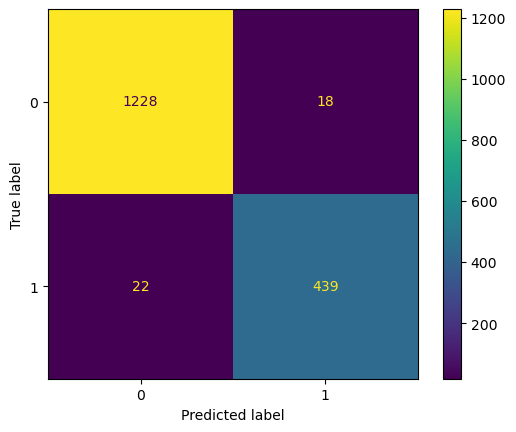

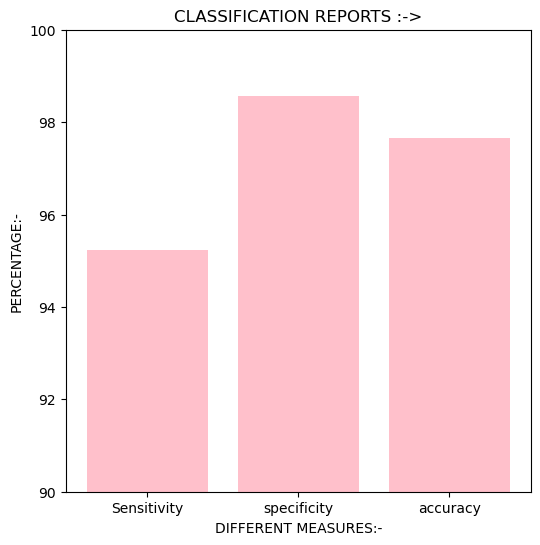

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
predictions = model_used.predict(x_tc)
cmt = confusion_matrix(y_test, predictions, labels=model_used.classes_)
dp = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=model_used.classes_)
dp.plot()
TruePos = cmt[1,1] 
TrueNeg = cmt[0,0] 
FalsePos = cmt[0,1] 
FalseNeg = cmt[1,0] 
print("Sensitivity="+str(TruePos/ float(TruePos+FalseNeg)))
print("Specificity="+str(TrueNeg/ float(FalsePos+TrueNeg)))
data = {'Sensitivity':(TruePos*100)/float(TruePos+FalseNeg), 'specificity':TrueNeg*100/(FalsePos+TrueNeg), 'accuracy':(TruePos+TrueNeg)*100/(TruePos+TrueNeg+FalsePos+FalseNeg)}

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
plt.bar(courses, values, color ='pink',width = 0.8)
plt.ylim(90, 100)
plt.xlabel("DIFFERENT MEASURES:-")
plt.ylabel("PERCENTAGE:-")
plt.title("CLASSIFICATION REPORTS :->")
plt.show()

In [139]:
print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision Score: {}'.format(precision_score(y_test, predictions)))
print('Recall Score: {}'.format(recall_score(y_test, predictions)))
print('F1 Score: {}'.format(f1_score(y_test, predictions)))

Accuracy Score: 0.9765670767428236
Precision Score: 0.9606126914660832
Recall Score: 0.9522776572668112
F1 Score: 0.9564270152505446


In [140]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

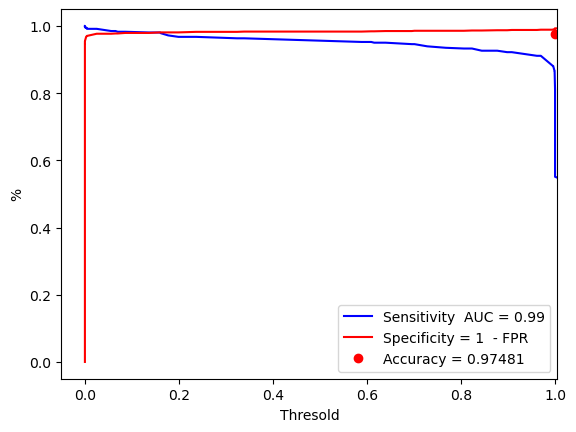

In [137]:
a = [1]
b = [accuracy_score(y_test,y_pred)]
plt.xlim(-0.05,1.005)
plt.ylabel('%')
plt.xlabel('Thresold')
plt.title('')
plt.plot(thresholds, true_positive_rate,'b',label = 'Sensitivity  AUC = %0.2f' % roc_auc)
plt.plot(thresholds, 1 - false_positive_rate,'r', label = 'Specificity = 1  - FPR')
plt.plot(a,b, "or",label = 'Accuracy = %0.5f' % accuracy_score(y_test,y_pred))
plt.legend(loc = 'lower right')
plt.show()